## About Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models.

### Importing libraries that are required to build this project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn import metrics
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

### Task 1: Retrieving and Preparing the Data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv ("/content/drive/MyDrive/AI/kc_house_data.csv", index_col=None)

In [ ]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dataset.shape

(21613, 21)

#### Reteriving first five columns of the dataset

In [ ]:
dataset.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


#### Reteriving last five columns of the datset

#### This DataSet has 21613 rows and 21 columns

In [ ]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
dataset.isnull().values.any()

False

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Observations
1. There is no missing value as such in the given dataset.

2. We have only integer and float type of data types.

In [ ]:
dataset_main = dataset.copy()
# we want to preprcess the `data` and extract the year in order to calcuate the age of the house.
dataset_main['year_sold'] = pd.to_datetime(dataset_main['date']).dt.date.astype('datetime64[ns]')
# extract only year
dataset_main['year_sold'] = pd.DatetimeIndex(dataset_main['year_sold']).year 


In [ ]:
dataset_main.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [ ]:
dataset_main = dataset_main.drop(columns=["id","date","lat", "long", "zipcode"])

#### Removing the id , date, lat , long and zipcode  columns as our main focus is to see the price of the house w.r.t to its features

In [ ]:
dataset_main.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year_sold
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,2015


In [ ]:
dataset_main['age_built'] = (dataset_main['year_sold'] - dataset_main['yr_built']).astype(int)

#### Calculating the age of the house 

In [ ]:
# calculate the years from renovation to sold. if no renovation happenned, then consider the built year as first renovation.
conditions = [dataset_main['yr_renovated'] == 0, dataset_main['yr_renovated'] != 0]
choices_age = [dataset_main['year_sold'] - dataset_main['yr_built'], dataset_main['year_sold'] - dataset_main['yr_renovated']]
dataset_main['age_renovated'] = np.select(conditions, choices_age)
# we want to know if the house have renovation (True/False)
choices_done_reno = [0, 1]
dataset_main['done_reno'] = np.select(conditions, choices_done_reno)

### Observations
1. Created three more columns as a feature(age_built,age_renovated and done_reno) columns from existing columns

In [ ]:
dataset_main.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year_sold,age_built,age_renovated,done_reno
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,2014,59,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,2014,63,23,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,2015,82,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,2014,49,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,2015,28,28,0


In [ ]:
dataset_main['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

### Task 2: Data Exploration

#### Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9be9d01d0>,
      dtype=object)

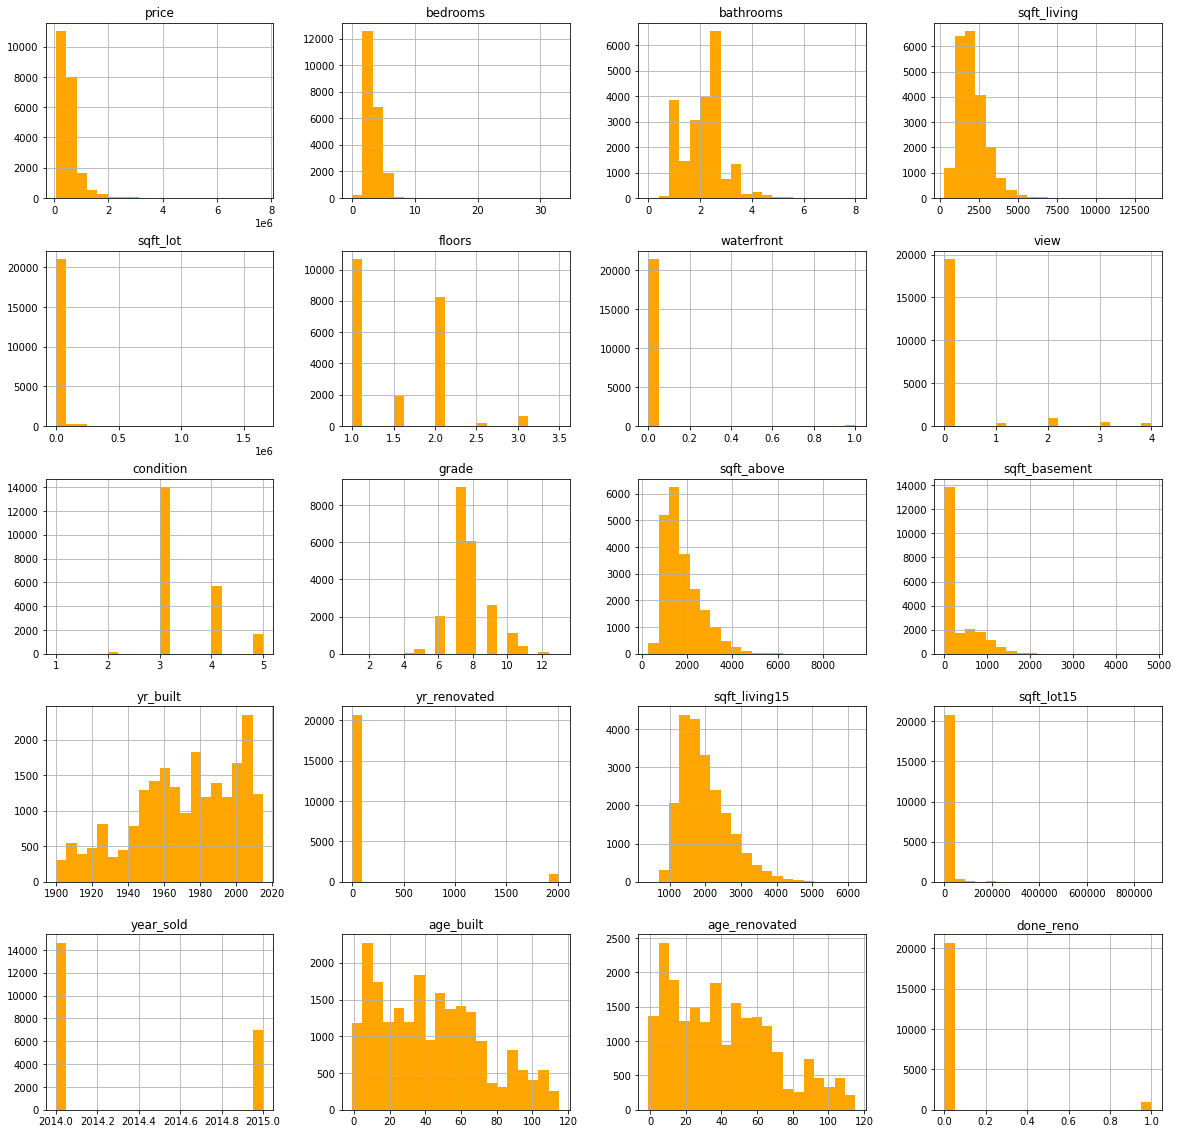

In [ ]:
dataset_main.hist(bins=20, figsize=(20,20), color='orange')

Text(0, 0.5, 'Price')

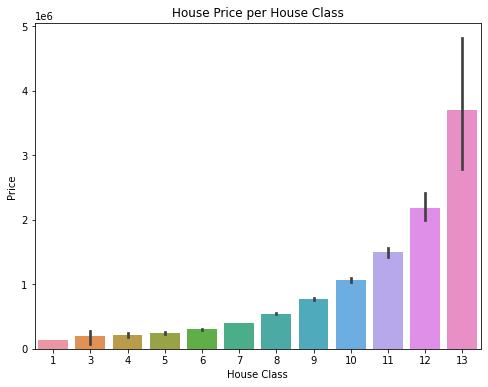

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(x='grade',y='price', data=dataset)
plt.title('House Price per House Class')
plt.xlabel('House Class')
plt.ylabel('Price')

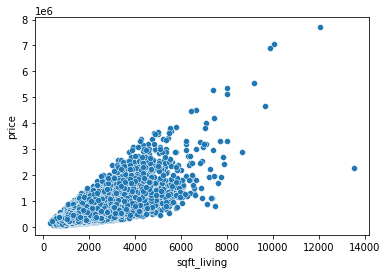

In [ ]:
sns.scatterplot(x='sqft_living', y='price', data=dataset)

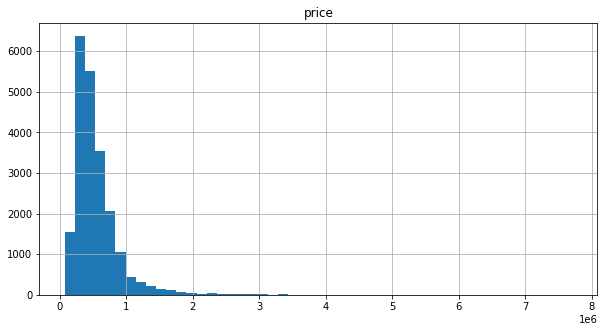

In [ ]:
dataset_main.hist(column = 'price', bins = 50, figsize = (10,5))
plt.show()

### Observations
1. The price data in the below histogram shows they are positively skewed,We can see a lot of outliers as we expected. i.e. it has a very wide price range, but it doesn't mean the data is wrong her

In [ ]:
dataset_main.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year_sold,age_built,age_renovated,done_reno
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447,0.003576,-0.053951,-0.105672,0.126092
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244,-0.009838,-0.154324,-0.165626,0.018553
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175,-0.026596,-0.506407,-0.537469,0.050260
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286,-0.029038,-0.318488,-0.344135,0.055094
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557,0.005468,-0.052990,-0.052809,0.007745
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269,-0.022315,-0.489640,-0.505651,0.006260
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703,-0.004165,0.026093,0.000469,0.093294
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575,0.001364,0.053458,0.018282,0.104062
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406,-0.045589,0.360665,0.395525,-0.060139
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248,-0.030387,-0.447415,-0.461180,0.014008


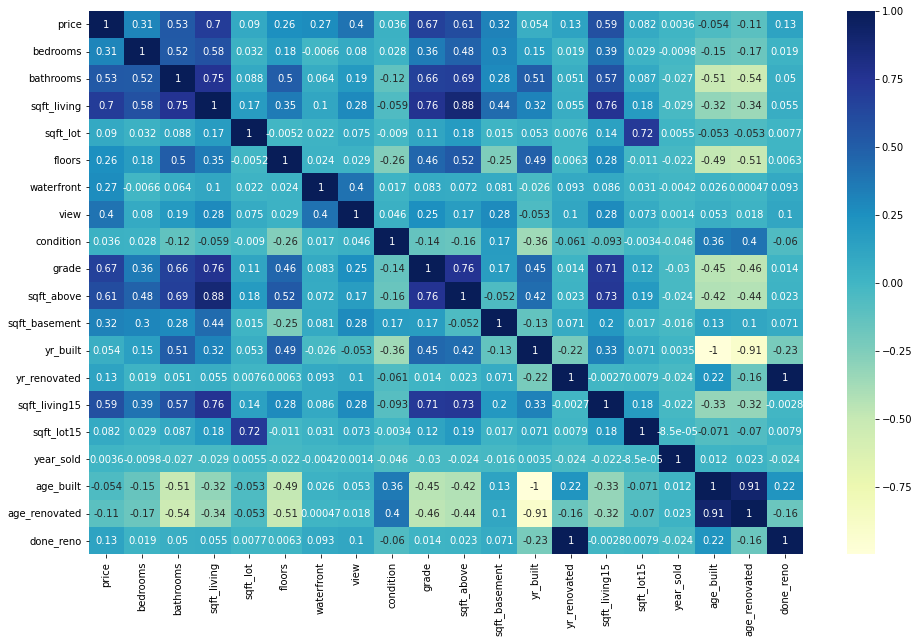

In [ ]:
# Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(dataset_main.corr(method='pearson'), annot=True,cmap="YlGnBu")
plt.show()

### Observations
1. In the above plot you can see price is closely associated with sqrt_living.

2. grade, sqft_above, sqrt_living15, bathrooms, and views, which does not surprised us. Because supposed to have highly correlation.
   
3. The more space you got, the higher the price you will get.

4. On the other hand, when the age is less for built and renovated.

5. The price is higher. (i.e., the newer house got a better price). 
6. This is as expected as we think in the market.

# Task 3: Data Modeling
### Training and Testing the data
### Splitting Data & Feature Scaling

In [ ]:
# features of the DataFrame
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'sqft_living15', 'sqft_lot15', 'age_built','age_renovated', 'done_reno']
X = dataset_main[features]
y = dataset_main[['price']]

#### Train and Test Model

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=2)
# set aside 30% for testing and 70% for training

In [ ]:
print("X-train shape: {}".format(X_train.shape))
print("y-train shape: {}".format(y_train.shape))

X-train shape: (15129, 16)
y-train shape: (15129, 1)


In [ ]:
print("X-test shape: {}".format(X_test.shape))
print("y-test shape: {}".format(y_test.shape))

X-test shape: (6484, 16)
y-test shape: (6484, 1)


### Scaling

In [ ]:
# Create the Scaler object
std_scaler = preprocessing.MinMaxScaler()

# apply the transformation to the training data
x_train_std = std_scaler.fit_transform(X_train) 

# apply the transformation to the testing data
x_test_std = std_scaler.transform(X_test) 

# convert resulting array back to dataframe
x_test_std_df = pd.DataFrame(x_test_std, columns = X_train.columns)

x_test_std_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age_built,age_renovated,done_reno
0,0.121212,0.28125,0.174658,0.003204,0.2,0.0,0.0,1.00,0.4,0.128386,0.197095,0.165376,0.005070,0.750000,0.750000,0.0
1,0.090909,0.18750,0.154110,0.013811,0.0,1.0,0.5,0.50,0.7,0.089517,0.215768,0.469971,0.015180,0.310345,0.310345,0.0
2,0.060606,0.12500,0.092466,0.005033,0.0,0.0,0.0,0.50,0.4,0.127208,0.000000,0.144726,0.006571,0.413793,0.413793,0.0
3,0.151515,0.40625,0.353596,0.007840,0.4,0.0,1.0,0.75,0.5,0.309776,0.311203,0.409740,0.023516,0.405172,0.405172,0.0
4,0.060606,0.12500,0.041952,0.004707,0.0,0.0,0.0,0.50,0.3,0.057715,0.000000,0.155051,0.006134,0.612069,0.612069,0.0


## Training a baseline Neural Network Model

In [ ]:
model = Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))
opt= Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='mean_squared_error')

### Observations
1. Having 16 neuron is based on the number of available features
2. learning_rate=0.01
3. batch_size=128
4. epochs= 50
5. activation function = relu
6. no of nodes in the hidden layers= 16
7. optimizer=Adam
8. loss function='mean_squared_error'

In [ ]:
x = np.asarray(x_train_std)
y = np.asarray(y_train)
X = np.asarray(x_test_std)
Y = np.asarray(y_test)

epochs_hist = model.fit(x,y,
          validation_data=(X,Y),
          batch_size=128,epochs=50)

Epoch 1/50
119/119 [==============================] - 1s 3ms/step - loss: 349183475712.0000 - val_loss: 103676321792.0000
Epoch 2/50
119/119 [==============================] - 0s 2ms/step - loss: 86369787904.0000 - val_loss: 81395990528.0000
Epoch 3/50
119/119 [==============================] - 0s 3ms/step - loss: 72071438336.0000 - val_loss: 69767053312.0000
Epoch 4/50
119/119 [==============================] - 0s 2ms/step - loss: 63999201280.0000 - val_loss: 63254532096.0000
Epoch 5/50
119/119 [==============================] - 0s 2ms/step - loss: 59278405632.0000 - val_loss: 58802966528.0000
Epoch 6/50
119/119 [==============================] - 0s 2ms/step - loss: 55977193472.0000 - val_loss: 55629258752.0000
Epoch 7/50
119/119 [==============================] - 0s 2ms/step - loss: 53425225728.0000 - val_loss: 53882425344.0000
Epoch 8/50
119/119 [==============================] - 0s 2ms/step - loss: 51602489344.0000 - val_loss: 51031216128.0000
Epoch 9/50
119/119 [==================

In [ ]:
y_pred = model.predict(x_test_std)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 122991.66381745806
MSE: 35079678666.888824
RMSE: 187295.69847406753


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def plot_model_loss(epochs_hist):
  plt.plot(epochs_hist.history['loss'])
  plt.plot(epochs_hist.history['val_loss'])

  plt.title('Model Loss Progression during Training')
  plt.xlabel('Epoch')
  plt.ylabel('Training and Validation Loss')
  plt.legend(['Training Loss', 'Validation Loss'])

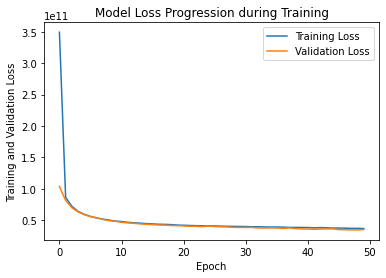

In [ ]:
plot_model_loss(epochs_hist)

### Hyper parameter Tuning with cross validation using Randomized Search

In [ ]:
def create_model(learning_rate=0.01,activation_fn='relu',no_neurons=16,loss='mean_squared_error',optimizer='Adam'):
    model = Sequential()
    model.add(Dense(no_neurons,activation=activation_fn))
    model.add(Dense(no_neurons,activation=activation_fn))
    model.add(Dense(no_neurons,activation=activation_fn))
    model.add(Dense(no_neurons,activation=activation_fn))
    model.add(Dense(1))
    model.compile(optimizer=optimizer,loss=loss)
    return model

### Observations
1. creating a model for hyperparameter tuning
2. number of neurons in each layers=16
3. number of hidden layers=3
4. activation function = relu

In [ ]:
# Create a KerasRegressor
model = KerasRegressor(build_fn = create_model,
                       verbose = 0, epochs=100)

### Tuning the learning Rate

In [ ]:
params = {'learning_rate': [0.1,0.01,0.001,0.0001]}
 

random_search = RandomizedSearchCV(model,
                                   param_distributions = params,
                                   cv = KFold(2),verbose=5)
x_train_std = np.asarray(x_train_std)
y_train = np.asarray(y_train)
random_search_results = random_search.fit(x_train_std, y_train)


print("Best Score: ",
      random_search_results.best_score_,
      "and Best Params: ",
      random_search_results.best_params_)

y_test_1= random_search_results.predict(x_test_std)
print('MAE:', metrics.mean_absolute_error(y_test_1, y_test))  
print('MSE:', metrics.mean_squared_error(y_test_1, y_test))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_1, y_test)))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ......learning_rate=0.1;, score=-44790898688.000 total time=  30.2s
[CV 2/2] END ......learning_rate=0.1;, score=-44577652736.000 total time=  42.3s
[CV 1/2] END .....learning_rate=0.01;, score=-45775097856.000 total time=  31.2s
[CV 2/2] END .....learning_rate=0.01;, score=-45414477824.000 total time=  31.4s
[CV 1/2] END ....learning_rate=0.001;, score=-43707486208.000 total time=  30.1s
[CV 2/2] END ....learning_rate=0.001;, score=-45555597312.000 total time=  29.9s
[CV 1/2] END ...learning_rate=0.0001;, score=-45591805952.000 total time=  30.4s
[CV 2/2] END ...learning_rate=0.0001;, score=-43751620608.000 total time=  30.0s
Best Score:  -44631541760.0 and Best Params:  {'learning_rate': 0.001}
MAE: 128452.34132455853
MSE: 38193256003.32965
RMSE: 195430.94945102645


### Observations
1. The neural network performs best at learning rate = 0.001
2. Leaning rate =0.001
3. Best Score:  -44631541760.0
4. MAE: 128452.3413245585
5. MSE: 38193256003.32965
6. RMSE: 195430.94945102645

### Tuning the activation function

In [ ]:
leaky = tf.keras.layers.LeakyReLU()
prelu = tf.keras.layers.PReLU()
params_2={'activation_fn':['sigmoid','relu','tanh', 'elu', leaky, prelu]}
random_search_2 = RandomizedSearchCV(model,
                                   param_distributions = params_2,
                                   cv = KFold(2),verbose=5)
random_search_results_2 = random_search_2.fit(x_train_std, y_train)

print("Best Score: ",
      random_search_results_2.best_score_,
      "and Best Params: ",
      random_search_results_2.best_params_)

y_test_2= random_search_results_2.predict(x_test_std)
print('MAE:', metrics.mean_absolute_error(y_test_2, y_test))  
print('MSE:', metrics.mean_squared_error(y_test_2, y_test))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_2, y_test)))

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END .activation_fn=sigmoid;, score=-426718527488.000 total time=  41.9s
[CV 2/2] END .activation_fn=sigmoid;, score=-423666515968.000 total time=  29.9s
[CV 1/2] END .....activation_fn=relu;, score=-46022729728.000 total time=  41.9s
[CV 2/2] END .....activation_fn=relu;, score=-46772015104.000 total time=  41.9s
[CV 1/2] END ....activation_fn=tanh;, score=-426707353600.000 total time=  30.0s
[CV 2/2] END ....activation_fn=tanh;, score=-423639416832.000 total time= 1.4min
[CV 1/2] END ......activation_fn=elu;, score=-46572523520.000 total time=  41.9s
[CV 2/2] END ......activation_fn=elu;, score=-47227633664.000 total time=  41.9s
[CV 1/2] END activation_fn=<keras.layers.advanced_activations.LeakyReLU object at 0x7fc9ae630810>;, score=-47835676672.000 total time=  31.0s
[CV 2/2] END activation_fn=<keras.layers.advanced_activations.LeakyReLU object at 0x7fc9ae630810>;, score=-47602843648.000 total time=  41.9s
[CV 1/2]

### Observation
1. the neural network performs best for PReLU as a activation function.
2. Activation function = PReLU
3. Best Score:  -42834239488.0 
4. MAE: 124182.36591935437
5. MSE: 33977091851.737972
6. RMSE: 184328.76024033246

In [ ]:
y_test_2.reshape(-1,1).shape

(6484, 1)

### Tuning the epochs

In [ ]:
params_3={'epochs':[25,50,75,100]}

random_search_3 = RandomizedSearchCV(model,
                                   param_distributions = params_3,
                                   cv = KFold(2),verbose=5)
random_search_results_3 = random_search_3.fit(x_train_std, y_train)

# displaying best score MAE, MSE and RMSE 
print("Best Score: ",
      random_search_results_3.best_score_,
      "and Best Params: ",
      random_search_results_3.best_params_)

y_test_3= random_search_results_3.predict(x_test_std)
print('MAE:', metrics.mean_absolute_error(y_test_3, y_test))  
print('MSE:', metrics.mean_squared_error(y_test_3, y_test))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_3, y_test)))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ..............epochs=25;, score=-59174875136.000 total time=   8.2s
[CV 2/2] END ..............epochs=25;, score=-59107127296.000 total time=   8.1s
[CV 1/2] END ..............epochs=50;, score=-49040719872.000 total time=  15.3s
[CV 2/2] END ..............epochs=50;, score=-50888515584.000 total time=  21.4s
[CV 1/2] END ..............epochs=75;, score=-44839497728.000 total time=  41.9s
[CV 2/2] END ..............epochs=75;, score=-45673680896.000 total time=  41.9s
[CV 1/2] END .............epochs=100;, score=-43432296448.000 total time=  29.6s
[CV 2/2] END .............epochs=100;, score=-48137351168.000 total time=  29.8s
Best Score:  -45256589312.0 and Best Params:  {'epochs': 75}
MAE: 132020.17285096005
MSE: 40880045492.82813
RMSE: 202188.14379885912


### Observations
1. The neural network works best for epoch = 75.
2. Epoch = 75
3. Best Score:  -45256589312.0
4. MAE: 132020.17285096005
5. MSE: 40880045492.82813
6. RMSE: 202188.14379885912

### Tuning the no of neurons

In [ ]:
params_4= {'no_neurons':[4, 8, 12, 16]}

random_search_4 = RandomizedSearchCV(model,
                                   param_distributions = params_4,
                                   cv = KFold(2),verbose=5)
random_search_results_4 = random_search_4.fit(x_train_std, y_train)


print("Best Score: ",
      random_search_results_4.best_score_,
      "and Best Params: ",
      random_search_results_4.best_params_)
y_test_4= random_search_results_4.predict(x_test_std)
print('MAE:', metrics.mean_absolute_error(y_test_4, y_test))  
print('MSE:', metrics.mean_squared_error(y_test_4, y_test))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_4, y_test)))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ...........no_neurons=4;, score=-54556598272.000 total time=  41.9s
[CV 2/2] END ...........no_neurons=4;, score=-54538661888.000 total time=  29.3s
[CV 1/2] END ...........no_neurons=8;, score=-49061949440.000 total time=  42.4s
[CV 2/2] END ...........no_neurons=8;, score=-51749167104.000 total time=  41.9s
[CV 1/2] END ..........no_neurons=12;, score=-47384973312.000 total time=  29.9s
[CV 2/2] END ..........no_neurons=12;, score=-46527643648.000 total time=  41.9s
[CV 1/2] END ..........no_neurons=16;, score=-46213931008.000 total time=  41.9s
[CV 2/2] END ..........no_neurons=16;, score=-45724446720.000 total time=  41.9s
Best Score:  -45969188864.0 and Best Params:  {'no_neurons': 16}
MAE: 132978.17859390678
MSE: 41312707614.51695
RMSE: 203255.27696597928


### Observations
1. The neural network performs best with 16 neurons, since there are 16 features in the dataset.
2. Number of neurons = 16
3. Best Score:  -45969188864.0 
4. MAE: 132978.17859390678
5. MSE: 41312707614.51695
6. RMSE: 203255.27696597928

### Tuning the optimizer

In [ ]:
# Tuning the optimizer
params_5= {'optimizer':['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']}

random_search_5 = RandomizedSearchCV(model,
                                   param_distributions = params_5,
                                   cv = KFold(2),verbose=5)
random_search_results_5 = random_search_5.fit(x_train_std, y_train)

print("Best Score: ",
      random_search_results_5.best_score_,
      "and Best Params: ",
      random_search_results_5.best_params_)
y_test_5= random_search_results_5.predict(x_test_std)
print('MAE:', metrics.mean_absolute_error(y_test_5, y_test))  
print('MSE:', metrics.mean_squared_error(y_test_5, y_test))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_5, y_test)))

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END ......optimizer=RMSprop;, score=-46470266880.000 total time=  31.6s
[CV 2/2] END ......optimizer=RMSprop;, score=-46574882816.000 total time=  42.1s
[CV 1/2] END .....optimizer=Adagrad;, score=-424281800704.000 total time=  28.2s
[CV 2/2] END .....optimizer=Adagrad;, score=-420520296448.000 total time=  41.8s
[CV 1/2] END ....optimizer=Adadelta;, score=-427138514944.000 total time=  41.9s
[CV 2/2] END ....optimizer=Adadelta;, score=-103944716288.000 total time=  41.9s
[CV 1/2] END .........optimizer=Adam;, score=-48975159296.000 total time=  29.5s
[CV 2/2] END .........optimizer=Adam;, score=-44541427712.000 total time=  30.0s
[CV 1/2] END .......optimizer=Adamax;, score=-59523706880.000 total time=  30.3s
[CV 2/2] END .......optimizer=Adamax;, score=-54035636224.000 total time=  41.9s
[CV 1/2] END ........optimizer=Nadam;, score=-44910215168.000 total time=  44.3s
[CV 2/2] END ........optimizer=Nadam;, score=-443

### Observations
1. The neural network performs best Nadam optimizer.
2. Optimizer   = Nadam
3. Best Score:  -44617385984.0
4. MAE: 127507.9685210711
5. MSE: 37178244893.11222
6. RMSE: 192816.60948453643

### Tuning the loss function

In [ ]:
params_6= {'loss':['mean_squared_error','mean_absolute_error']}
random_search_6 = RandomizedSearchCV(model,
                                   param_distributions = params_6,
                                   cv = KFold(2),verbose=5)
random_search_results_6 = random_search_6.fit(x_train_std, y_train)

# displaying best score MAE, MSE and RMSE 
print("Best Score: ",
      random_search_results_6.best_score_,
      "and Best Params: ",
      random_search_results_6.best_params_)
y_test_6= random_search_results_6.predict(x_test_std)
print('MAE:', metrics.mean_absolute_error(y_test_6, y_test))  
print('MSE:', metrics.mean_squared_error(y_test_6, y_test))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_6, y_test)))

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END loss=mean_squared_error;, score=-44473073664.000 total time=  41.9s
[CV 2/2] END loss=mean_squared_error;, score=-42730905600.000 total time=  41.9s
[CV 1/2] END ....loss=mean_absolute_error;, score=-136941.250 total time=  29.6s
[CV 2/2] END ....loss=mean_absolute_error;, score=-135446.141 total time=  29.7s
Best Score:  -136193.6953125 and Best Params:  {'loss': 'mean_absolute_error'}
MAE: 128463.02451685636
MSE: 45475642115.84365
RMSE: 213250.18667247082


### Observations
1. The neural network performs best when loss function is mean_absolute_error
2. Loss Function = mean_absolute_error
3. Best Score:  -136193.6953125
4. MAE: 128463.02451685636
5. MSE: 45475642115.84365
6. RMSE: 213250.18667247082

### Tuning the batch size

In [ ]:
params_7={'batch_size':[32,64,128]}

random_search_7 = RandomizedSearchCV(model,
                                   param_distributions = params_7,
                                   cv = KFold(2),verbose=5)
random_search_results_7 = random_search_7.fit(x_train_std, y_train)

# displaying best score MAE, MSE and RMSE 
print("Best Score: ",
      random_search_results_7.best_score_,
      "and Best Params: ",
      random_search_results_7.best_params_)
y_test_7= random_search_results_7.predict(x_test_std)
print('MAE:', metrics.mean_absolute_error(y_test_7, y_test))  
print('MSE:', metrics.mean_squared_error(y_test_7, y_test))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_7, y_test)))

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END ..........batch_size=32;, score=-46211952640.000 total time=  30.0s
[CV 2/2] END ..........batch_size=32;, score=-45234769920.000 total time=  41.9s
[CV 1/2] END ..........batch_size=64;, score=-48310747136.000 total time=  15.3s
[CV 2/2] END ..........batch_size=64;, score=-51581956096.000 total time=  21.3s
[CV 1/2] END .........batch_size=128;, score=-51272466432.000 total time=  10.9s
[CV 2/2] END .........batch_size=128;, score=-54043717632.000 total time=   8.2s
Best Score:  -45723361280.0 and Best Params:  {'batch_size': 32}
MAE: 130706.32520690249
MSE: 39905912150.538574
RMSE: 199764.64189274982


#### Observation
1. The neural network performs best for batch_size = 32
2. Batch_size = 32
3. MAE: 130706.32520690249
4. MSE: 39905912150.538574
5. RMSE: 199764.64189274982

### Plotting the results of activation function as giving best rmse

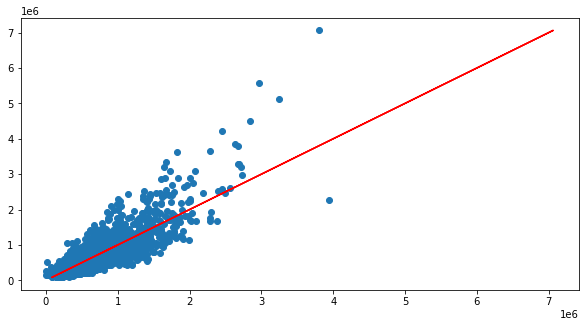

In [ ]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test_4,y_test)
# Perfect predictions
plt.plot(y_test,y_test,'r')